In [2]:
%matplotlib inline
import precomputed_domain
import numpy as np
import brewer2mpl

# brewer2mpl.get_map args: set name  set type  number of colors
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
colors = bmap.mpl_colors

## Loading hard maze data

In [3]:
maze = "hard"
domain = precomputed_domain.precomputed_maze_domain(maze,storage_directory="./logs/",mmap=True)

cached...


In [3]:
for k in range(1,5):
 domain.kstep_evolvability_calculate(k)
domain.everywhere_evolvability_calculate()

cached...
cached...
cached...
cached...
cached...


# Basic exploratory queries

In [4]:
evo = domain.data["evolvability"]
beh = domain.data["x"],domain.data["y"]

fitness = np.sqrt(  ((beh[0].astype(np.int32))-domain.goal[0])**2 + ((beh[1].astype(np.int32))-domain.goal[1])**2 )
solution_distance = domain.distance
solution = domain.data["solution"]

print 'Where is the goal point?' , domain.goal
print 'How many solutions are there to the maze?', solution.sum()

print 'What is the mean fitness score across all individuals?', fitness.mean()

print 'How many discretized behaviors are there?', len(np.unique(domain.data["behaviorhash"]))

Where is the goal point? (31, 20)
How many solutions are there to the maze? 59
What is the mean fitness score across all individuals? 146.51622060606374
How many discretized behaviors are there? 303


# Evolvability histograms

/home/chrx/.local/lib/python2.7/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  mplDeprecation)


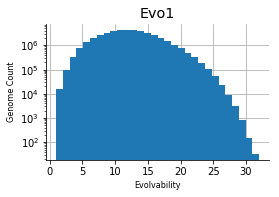

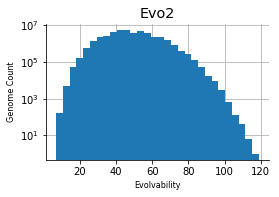

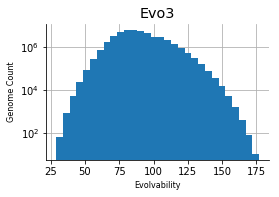

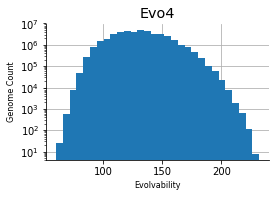

In [5]:
from pylab import *

params = {
   'axes.labelsize': 8,
   'text.fontsize': 12,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [4.0, 2.5]
   }
rcParams.update(params)

for k in range(1,5):
 domain.kstep_evolvability_calculate(k)
 fig=figure()
 ax=fig.add_subplot(111)
 ax.grid()
 ax.spines['top'].set_visible(False)
 ax.spines['right'].set_visible(False)
 ax.spines['left'].set_visible(True)
 ax.get_xaxis().tick_bottom()
 ax.get_yaxis().tick_left()
 ax.set_xlabel("Evolvability")
 ax.set_ylabel("Genome Count")
 #ax.tick_params(axis='x', direction='out')
 ax.tick_params(axis='y') # length=0)
 # offset the spines
 #for spine in ax.spines.values():
 #  spine.set_position(('outward', 5))
 # put the grid behind
 ax.set_axisbelow(True)
 ax.set_yscale('log', nonposy='clip')
 ax.hist(domain.evo[k],bins=30)
 ax.set_title("Evo%d"%k)
 fig.savefig("evolvability_distribution%s_%d.pdf"%(maze,k), bbox_inches='tight')

## Everywhere-evolvability

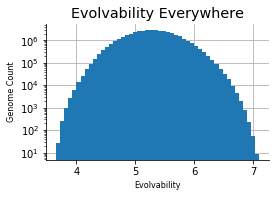

In [6]:
domain.everywhere_evolvability_calculate()

if True:
 fig=figure()
 ax=fig.add_subplot(111)
 ax.grid()
 ax.spines['top'].set_visible(False)
 ax.spines['right'].set_visible(False)
 ax.spines['left'].set_visible(True)
 ax.get_xaxis().tick_bottom()
 ax.get_yaxis().tick_left()
 ax.set_xlabel("Evolvability")
 ax.set_ylabel("Genome Count")
 #ax.tick_params(axis='x', direction='out')
 ax.tick_params(axis='y') # length=0)
 # offset the spines
 #for spine in ax.spines.values():
 #  spine.set_position(('outward', 5))
 # put the grid behind
 ax.set_axisbelow(True)
 ax.set_yscale('log', nonposy='clip')
 ax.hist(domain.evo_everywhere,bins=50)
 ax.set_title("Evolvability Everywhere")
 fig.savefig("evolvability_everywhere%s.pdf"%maze, bbox_inches='tight')

In [10]:
worst = np.argmax(domain.evo_everywhere)
print "Index of worst 1-step evolvability individual:",worst
print "Lowest evolvability score:",domain.data["evolvability"][worst]

best = np.argmin(domain.evo_everywhere)
print "Index of best 1-step evolvability individual:",best
print "Highest evolvability score:",domain.data["evolvability"][best]


Index of worst 1-step evolvability individual: 42284921
Lowest evolvability score: 6
Index of best 1-step evolvability individual: 6734463
Highest evolvability score: 21


# Fitness Histogram

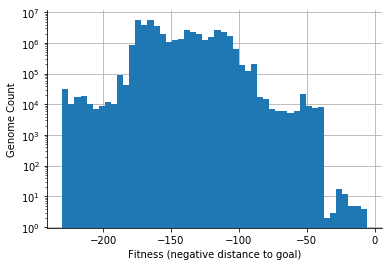

In [5]:
#hist(fitness,bins=100)
from pylab import *

if True:
 fig=figure()
 ax=fig.add_subplot(111)
 ax.grid()
 ax.spines['top'].set_visible(False)
 ax.spines['right'].set_visible(False)
 ax.spines['left'].set_visible(True)
 ax.get_xaxis().tick_bottom()
 ax.get_yaxis().tick_left()
 ax.set_xlabel("Fitness (negative distance to goal)")
 ax.set_ylabel("Genome Count")
 #ax.tick_params(axis='x', direction='out')
 ax.tick_params(axis='y') # length=0)
 # offset the spines
 #for spine in ax.spines.values():
 #  spine.set_position(('outward', 5))
 # put the grid behind
 ax.set_axisbelow(True)
 ax.set_yscale('log', nonposy='clip')
 ax.hist(-fitness,bins=50)
 fig.savefig("fitness_distribution_%s.pdf"%maze, bbox_inches='tight')


# Solution Distance Histogram

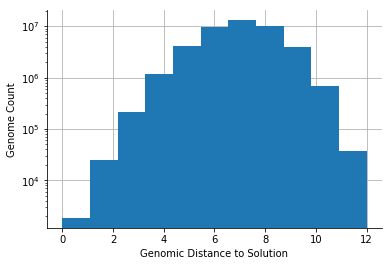

In [6]:
if True:
 fig=figure()
 ax=fig.add_subplot(111)
 ax.grid()
 ax.spines['top'].set_visible(False)
 ax.spines['right'].set_visible(False)
 ax.spines['left'].set_visible(True)
 ax.get_xaxis().tick_bottom()
 ax.get_yaxis().tick_left()
 ax.set_xlabel("Genomic Distance to Solution")
 ax.set_ylabel("Genome Count")
 #ax.tick_params(axis='x', direction='out')
 ax.tick_params(axis='y') # length=0)
 # offset the spines
 #for spine in ax.spines.values():
 #  spine.set_position(('outward', 5))
 # put the grid behind
 ax.set_axisbelow(True)
 ax.set_yscale('log', nonposy='clip')
 ax.hist(domain.distance,bins=11)
 fig.savefig("fitness_distribution_%s.pdf"%maze, bbox_inches='tight')



# Behavior distribution

In [4]:
def construct_behavior_grid(xdata,ydata,default_val=None,quantity=None,grid_sz=30):
    cnt = np.zeros((grid_sz,grid_sz))
    #evo_dist = np.zeros((grid_sz,grid_sz))-1
    
    xmax = xdata.max()+0.00001
    ymax = ydata.max()+0.00001
    
    xcoord = (xdata/xmax)*(grid_sz)
    ycoord = (ydata/ymax)*(grid_sz)

    xcoord = xcoord.astype(int)
    ycoord = ycoord.astype(int)
    
    print "adding..."
    np.add.at(cnt,(xcoord,ycoord),1)
    #cnt/=xcoord.shape[0]
    
    if default_val != None:
        print "not none..."
        mask = cnt==0
        cnt[cnt!=0] = np.log(cnt[cnt!=0])
        cnt[mask] = default_val
    else:
     total = np.zeros((grid_sz,grid_sz))
     np.add.at(total,(xcoord,ycoord),quantity)
     total[cnt==0]=-10
     cnt[cnt==0]=1
     
     mean = total/cnt
     return mean

    
        
     
    return cnt


adding...
not none...
done


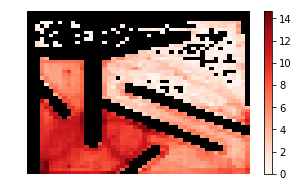

In [8]:
from pylab import *
params = {
   'axes.labelsize': 14,
   'text.fontsize': 12,
   'legend.fontsize': 10,
   'xtick.labelsize': 14,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [5.0, 3.0]
   }
rcParams.update(params)

import prettyplotlib as ppl
fig, ax = plt.subplots(1)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
plt.axis('off')

gray()
plot=construct_behavior_grid(domain.data["x"],domain.data["y"],default_val=-1,grid_sz=50)
#plot=construct_behavior_grid(domain.data["x"],domain.data["y"],quantity=evo,grid_sz=50)


plot=plot.transpose()
plot=np.flipud(plot)

plot[plot==-1]=np.nan

plot = np.ma.masked_invalid(plot)

red_purple = brewer2mpl.get_map('Reds', 'Sequential', 9).mpl_colormap
red_purple.set_bad('black')
ppl.pcolormesh(fig, ax, plot,cmap=red_purple)
#matshow(plot,figure=0)
print "done"
fig.savefig('density_%s.pdf'%maze)